In [1]:
from __future__ import print_function
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline  

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [23]:
beta = np.random.beta(0.5,0.5)
print(beta)

0.6514507606048325


In [3]:
#Boiler for CNN with CIFAR-10

batch_size = 64
num_classes = 2
epochs = 100

# input image dimensions
img_rows, img_cols = 32, 32   

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()   

# Only look at cats [=3] and dogs [=5]
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
test_picks = np.ravel(np.logical_or(y_test==3,y_test==5))     

y_train = np.array(y_train[train_picks]==5,dtype=int)
y_test = np.array(y_test[test_picks]==5,dtype=int)

X_train = X_train[train_picks]
X_test = X_test[test_picks]

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
y_test = keras.utils.to_categorical(np.ravel(y_test), num_classes)

X_train shape: (10000, 32, 32, 3)
10000 train samples
2000 test samples


In [4]:
#CNN Model
def cnn_model() : 
    model = Sequential()
    model.add(Conv2D(4, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    # print(model.summary())
    return(model)

In [ ]:
#Boiler for Deepforward net



In [ ]:
#DeepFeedforward
def deepForward_model():
    model = Sequential()
    model

In [8]:
#Plotting Function
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig(str(i)+'-accuracy.png')
    plt.close(fig)

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
 - 8s - loss: 0.6931 - acc: 0.5040 - val_loss: 0.6922 - val_acc: 0.5015
Epoch 2/100
 - 7s - loss: 0.6912 - acc: 0.5195 - val_loss: 0.6893 - val_acc: 0.5500
Epoch 3/100
 - 7s - loss: 0.6852 - acc: 0.5523 - val_loss: 0.6841 - val_acc: 0.5500
Epoch 4/100
 - 7s - loss: 0.6752 - acc: 0.5741 - val_loss: 0.6620 - val_acc: 0.6040
Epoch 5/100
 - 7s - loss: 0.6710 - acc: 0.5840 - val_loss: 0.6545 - val_acc: 0.6285
Epoch 6/100
 - 7s - loss: 0.6628 - acc: 0.6074 - val_loss: 0.6508 - val_acc: 0.6165
Epoch 7/100
 - 7s - loss: 0.6562 - acc: 0.6072 - val_loss: 0.6351 - val_acc: 0.6385
Epoch 8/100
 - 7s - loss: 0.6509 - acc: 0.6223 - val_loss: 0.6403 - val_acc: 0.6160
Epoch 9/100
 - 7s - loss: 0.6458 - acc: 0.6251 - val_loss: 0.6559 - val_acc: 0.6055
Epoch 10/100
 - 7s - loss: 0.6371 - acc: 0.6386 - val_loss: 0.6192 - val_acc: 0.6610
Epoch 11/100
 - 7s - loss: 0.6311 - acc: 0.6433 - val_loss: 0.6186 - val_acc: 0.6760
Epoch 12/100
 - 7s - loss

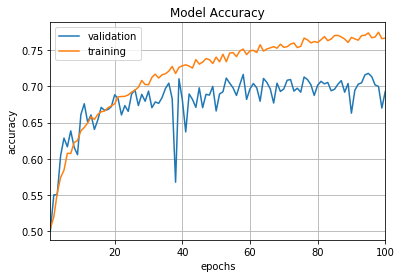

ValueError: Format "jpg" is not supported.
Supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz.

In [5]:
#Constant Learning Rate

# define CNN model
model1 = cnn_model()

# define SGD optimizer
learning_rate = 0.1
sgd = SGD(lr=learning_rate, momentum=0.0, decay=0.0, nesterov=False) # set to default except lr

# compile the model
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# fit the model
history1 = model1.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=2,
                validation_data=(X_test, y_test))

# plot model accuracy
plot_fig(1, history1)

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
 - 8s - loss: 0.6936 - acc: 0.4989 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/100
 - 7s - loss: 0.6935 - acc: 0.5040 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 3/100
 - 7s - loss: 0.6937 - acc: 0.5010 - val_loss: 0.6932 - val_acc: 0.4995
Epoch 4/100
 - 7s - loss: 0.6935 - acc: 0.4934 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 5/100
 - 7s - loss: 0.6935 - acc: 0.4985 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 6/100
 - 7s - loss: 0.6934 - acc: 0.4980 - val_loss: 0.6931 - val_acc: 0.4995
Epoch 7/100
 - 7s - loss: 0.6934 - acc: 0.5051 - val_loss: 0.6932 - val_acc: 0.5005
Epoch 8/100
 - 7s - loss: 0.6933 - acc: 0.5005 - val_loss: 0.6932 - val_acc: 0.5030
Epoch 9/100
 - 7s - loss: 0.6934 - acc: 0.4969 - val_loss: 0.6932 - val_acc: 0.5020
Epoch 10/100
 - 7s - loss: 0.6934 - acc: 0.5012 - val_loss: 0.6932 - val_acc: 0.4995
Epoch 11/100
 - 7s - loss: 0.6932 - acc: 0.5072 - val_loss: 0.6935 - val_acc: 0.5005
Epoch 12/100
 - 7s - loss

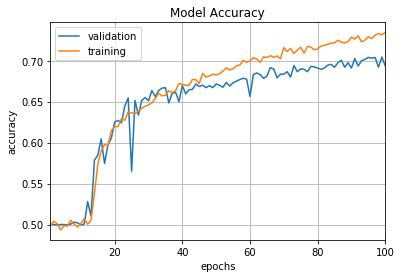

FileNotFoundError: [Errno 2] No such file or directory: 'img/2-accuracy.png'

In [7]:
#Time Based learning rate

# define CNN model
model2 = cnn_model()

# define SGD optimizer
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.5
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# compile the model
model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# fit the model
history2 = model2.fit(X_train, y_train, 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2, 
                     validation_data=(X_test, y_test))

# plot model accuracy
plot_fig(2, history2)

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
lr: 0.1
 - 7s - loss: 0.6938 - acc: 0.5006 - val_loss: 0.6913 - val_acc: 0.5010
Epoch 2/100
lr: 0.1
 - 8s - loss: 0.6810 - acc: 0.5617 - val_loss: 0.6656 - val_acc: 0.6045
Epoch 3/100
lr: 0.1
 - 8s - loss: 0.6657 - acc: 0.5946 - val_loss: 0.6516 - val_acc: 0.6315
Epoch 4/100
lr: 0.1
 - 8s - loss: 0.6546 - acc: 0.6087 - val_loss: 0.6549 - val_acc: 0.6035
Epoch 5/100
lr: 0.1
 - 8s - loss: 0.6461 - acc: 0.6191 - val_loss: 0.6378 - val_acc: 0.6285
Epoch 6/100
lr: 0.1
 - 8s - loss: 0.6340 - acc: 0.6392 - val_loss: 0.6433 - val_acc: 0.6225
Epoch 7/100
lr: 0.1
 - 8s - loss: 0.6284 - acc: 0.6376 - val_loss: 0.6349 - val_acc: 0.6330
Epoch 8/100
lr: 0.1
 - 8s - loss: 0.6162 - acc: 0.6577 - val_loss: 0.6187 - val_acc: 0.6440
Epoch 9/100
lr: 0.1
 - 7s - loss: 0.6121 - acc: 0.6532 - val_loss: 0.6119 - val_acc: 0.6555
Epoch 10/100
lr: 0.05
 - 8s - loss: 0.6049 - acc: 0.6678 - val_loss: 0.6103 - val_acc: 0.6555
Epoch 11/100
lr: 0.05
 - 8s -

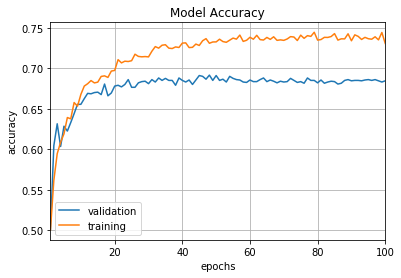

In [9]:
#Step Decay Learning Rate

# define CNN model
model3 = cnn_model()

# define SGD optimizer
momentum = 0.5
sgd = SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False) 

# compile the model
model3.compile(loss=keras.losses.categorical_crossentropy,optimizer=sgd, metrics=['accuracy'])

# define step decay function
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    return lrate

# learning schedule callback
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]

# fit the model
history3 = model3.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size, 
                     callbacks=callbacks_list, 
                     verbose=2)

# plot model accuracy
plot_fig(3, history3)

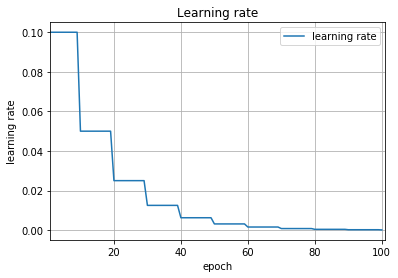

In [12]:
#Step Decay Learning Rate Plotter

# plot learning rate
fig = plt.figure()
plt.plot(range(1,epochs+1),loss_history.lr,label='learning rate')
plt.xlabel("epoch")
plt.xlim([1,epochs+1])
plt.ylabel("learning rate")
plt.legend(loc=0)
plt.grid(True)
plt.title("Learning rate")
plt.show()
fig.savefig('3-learning-rate.png')
plt.close(fig)

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
lr: 0.0904837418036
 - 8s - loss: 0.6886 - acc: 0.5344 - val_loss: 0.6677 - val_acc: 0.5855
Epoch 2/100
lr: 0.0818730753078
 - 8s - loss: 0.6810 - acc: 0.5559 - val_loss: 0.6741 - val_acc: 0.5825
Epoch 3/100
lr: 0.0740818220682
 - 8s - loss: 0.6666 - acc: 0.5893 - val_loss: 0.6564 - val_acc: 0.6155
Epoch 4/100
lr: 0.0670320046036
 - 8s - loss: 0.6510 - acc: 0.6115 - val_loss: 0.6427 - val_acc: 0.6210
Epoch 5/100
lr: 0.0606530659713
 - 8s - loss: 0.6425 - acc: 0.6306 - val_loss: 0.6342 - val_acc: 0.6430
Epoch 6/100
lr: 0.0548811636094
 - 8s - loss: 0.6277 - acc: 0.6500 - val_loss: 0.6179 - val_acc: 0.6535
Epoch 7/100
lr: 0.0496585303791
 - 8s - loss: 0.6102 - acc: 0.6606 - val_loss: 0.6220 - val_acc: 0.6360
Epoch 8/100
lr: 0.0449328964117
 - 8s - loss: 0.6058 - acc: 0.6756 - val_loss: 0.6076 - val_acc: 0.6585
Epoch 9/100
lr: 0.0406569659741
 - 8s - loss: 0.5902 - acc: 0.6823 - val_loss: 0.6025 - val_acc: 0.6790
Epoch 10/100
lr

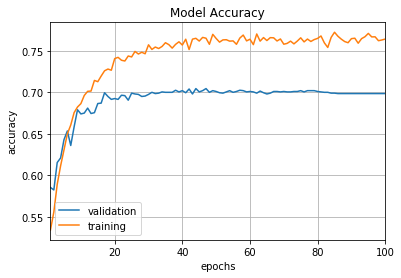

In [13]:
#Exponential Decay Learning Rate

# define CNN model
model4 = cnn_model()

# define SGD optimizer
momentum = 0.8
sgd = SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False)

# compile the model
model4.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# define step decay function
class LossHistory_(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(exp_decay(len(self.losses)))
        print('lr:', exp_decay(len(self.losses)))

def exp_decay(epoch):
    initial_lrate = 0.1
    k = 0.1
    lrate = initial_lrate * np.exp(-k*epoch)
    return lrate

# learning schedule callback
loss_history_ = LossHistory_()
lrate_ = LearningRateScheduler(exp_decay)
callbacks_list_ = [loss_history_, lrate_]

# fit the model
history4 = model4.fit(X_train, y_train, 
     validation_data=(X_test, y_test), 
     epochs=epochs, 
     batch_size=batch_size, 
     callbacks=callbacks_list_, 
     verbose=2)

# plot model accuracy
plot_fig(4, history4)

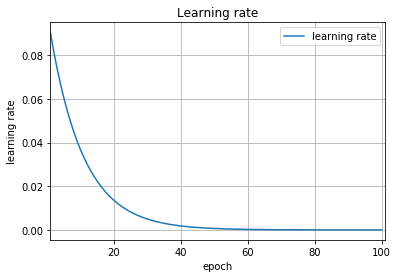

In [14]:
#Exponential decay Learning rate plotter

# plot learning rate
fig = plt.figure()
plt.plot(range(1,epochs+1),loss_history_.lr,label='learning rate')
plt.xlabel("epoch")
plt.xlim([1,epochs+1])
plt.ylabel("learning rate")
plt.legend(loc=0)
plt.grid(True)
plt.title("Learning rate")
plt.show()
fig.savefig('4-learning-rate.png')
plt.close(fig)

In [ ]:
#Adaptive Learning rate algorithms

# fit CNN model using Adagrad optimizer
model5 = cnn_model()
model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adagrad(lr=0.01, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history5 = model5.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

# fit CNN model using Adadelta optimizer
model6 = cnn_model()
model6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history6 = model6.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

# fit CNN model using RMSprop optimizer
model7 = cnn_model()
model7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history7 = model7.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

# fit CNN model using Adam optimizer
model8 = cnn_model()
model8.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history8 = model8.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
 - 8s - loss: 0.6866 - acc: 0.5538 - val_loss: 0.6814 - val_acc: 0.5370
Epoch 2/100
 - 8s - loss: 0.6695 - acc: 0.5930 - val_loss: 0.6575 - val_acc: 0.6095
Epoch 3/100
 - 8s - loss: 0.6606 - acc: 0.6059 - val_loss: 0.6488 - val_acc: 0.6420
Epoch 4/100
 - 8s - loss: 0.6495 - acc: 0.6219 - val_loss: 0.6439 - val_acc: 0.6310
Epoch 5/100
 - 8s - loss: 0.6437 - acc: 0.6362 - val_loss: 0.6313 - val_acc: 0.6440
Epoch 6/100
 - 8s - loss: 0.6337 - acc: 0.6432 - val_loss: 0.6225 - val_acc: 0.6610
Epoch 7/100
 - 8s - loss: 0.6279 - acc: 0.6539 - val_loss: 0.6184 - val_acc: 0.6620
Epoch 8/100
 - 8s - loss: 0.6270 - acc: 0.6509 - val_loss: 0.6128 - val_acc: 0.6690
Epoch 9/100
 - 8s - loss: 0.6197 - acc: 0.6592 - val_loss: 0.6136 - val_acc: 0.6600
Epoch 10/100
 - 8s - loss: 0.6169 - acc: 0.6620 - val_loss: 0.6079 - val_acc: 0.6765
Epoch 11/100
 - 8s - loss: 0.6143 - acc: 0.6640 - val_loss: 0.6014 - val_acc: 0.6760
Epoch 12/100
 - 8s - loss

In [ ]:
#Uniform Random Learning Rate

# define CNN model
model9 = cnn_model()

# define SGD optimizer
learning_rate = np.random.uniform(low=0.0, high=1.0)
sgd = SGD(lr=learning_rate, momentum=0.0, decay=0.0, nesterov=False) # set to default except lr

# compile the model
model9.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

def lrate_stepper(epoch):
    lrate = np.random.uniform(0,1)
    return(lrate)

lrate = LearningRateScheduler(lrate_stepper)

# fit the model
history9 = model9.fit(X_train, y_train,
                      batch_size=batch_size,
                      callbacks=lrate
                      epochs=epochs,
                      verbose=2,
                      validation_data=(X_test, y_test))

# plot model accuracy
plot_fig(5, history9)

In [ ]:
#Triangular Learning Rate

# define CNN model
model10 = cnn_model()

# define SGD optimizer
learning_rate = np.random.triangular(0, 0.5, 1)
sgd = SGD(lr=learning_rate, momentum=0.0, decay=0.0, nesterov=False) # set to default except lr

# compile the model
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

lrate_ = LearningRateScheduler(exp_decay)
                         
# fit the model
history10 = model1.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=2,
                validation_data=(X_test, y_test))

# plot model accuracy
plot_fig(6, history10)

In [ ]:
#Log Series Leanring Rate

# define CNN model
model11 = cnn_model()

# define SGD optimizer
learning_rate = 0.1
sgd = SGD(lr=learning_rate, momentum=0.0, decay=0.0, nesterov=False) # set to default except lr

# compile the model
model11.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# fit the model
history11 = model1.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=2,
                validation_data=(X_test, y_test))

# plot model accuracy
plot_fig(7, history11)

In [ ]:
#Beta Learning Rate

# define CNN model
model12 = cnn_model()

# define SGD optimizer
learning_rate = 0.1
sgd = SGD(lr=learning_rate, momentum=0.0, decay=0.0, nesterov=False) # set to default except lr

# compile the model
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# fit the model
history12 = model1.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=2,
                validation_data=(X_test, y_test))

# plot model accuracy
plot_fig(8, history12)

In [5]:
#Master Plot

fig = plt.figure(figsize=(12,8))
plt.plot(range(epochs),history1.history['val_acc'],label='Constant lr')
plt.plot(range(epochs),history2.history['val_acc'],label='Time-based')
plt.plot(range(epochs),history3.history['val_acc'],label='Step decay')
plt.plot(range(epochs),history4.history['val_acc'],label='Exponential decay')
plt.plot(range(epochs),history5.history['val_acc'],label='Adagrad')
plt.plot(range(epochs),history6.history['val_acc'],label='Adadelta')
plt.plot(range(epochs),history7.history['val_acc'],label='RMSprop')
plt.plot(range(epochs),history8.history['val_acc'],label='Adam')
plt.plot(range(epochs),history9.history['val_acc'],label='Uniform Random')
plt.plot(range(epochs),history10.history['val_acc'],label='Log Normal')
plt.plot(range(epochs),history11.history['val_acc'],label='Gaussian')
plt.plot(range(epochs),history12.history['val_acc'],label='Gamma')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.xlim([0,epochs])
plt.ylabel('accuracy om validation set')
plt.grid(True)
plt.title("Comparing Model Accuracy")
plt.show()
fig.savefig('img/compare-accuracy.jpg')
plt.close(fig)

NameError: name 'history1' is not defined